# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

4.392878575715143 -0.949389314627917
4.396879375875175 -0.9506383715906622
4.400880176035207 -0.9518722122738473
4.404880976195239 -0.9530908169281486
4.408881776355271 -0.9542941660481161
4.412882576515303 -0.9554822403724862
4.416883376675335 -0.9566550208844888
4.420884176835367 -0.9578124888121529
4.424884976995399 -0.9589546256286061
4.428885777155431 -0.9600814130523722
4.432886577315463 -0.9611928330476626
4.436887377475495 -0.9622888678246659
4.440888177635527 -0.9633694998398326
4.444888977795559 -0.964434711796155
4.448889777955591 -0.9654844866434455
4.452890578115623 -0.9665188075786082
4.456891378275655 -0.9675376580459086
4.460892178435687 -0.9685410217372385
4.464892978595719 -0.9695288825923767
4.468893778755751 -0.9705012247992463
4.472894578915783 -0.9714580327941681
4.476895379075815 -0.972399291262109
4.480896179235847 -0.9733249851369279
4.484896979395879 -0.9742350996016164
4.488897779555911 -0.9751296200885358
4.492898579715943 -0.9760085322796508
4.4968993798759

9.05381076215243 0.3625170084028299
9.057811562312462 0.35878546270388284
9.061812362472494 0.3550481741482767
9.065813162632526 0.3513052025564744
9.069813962792558 0.3475566078399038
9.07381476295259 0.3438024499999983
9.077815563112622 0.3400427891272373
9.081816363272655 0.3362776854001834
9.085817163432687 0.33250719908451964
9.089817963592719 0.3287313905320851
9.09381876375275 0.3249503201799084
9.097819563912783 0.32116404854924047
9.101820364072815 0.317372636244586
9.105821164232847 0.3135761439527333
9.109821964392879 0.30977463244178277
9.11382276455291 0.3059681625601744
9.117823564712943 0.30215679523571376
9.121824364872975 0.29834059147459674
9.125825165033007 0.29451961236043306
9.129825965193039 0.2906939190532686
9.13382676535307 0.2868635727886063
9.137827565513103 0.28302863487642627
9.141828365673135 0.27918916670020416
9.145829165833167 0.2753452297159288
9.149829965993199 0.27149688545111844
9.15383076615323 0.26764419550383595
9.157831566313263 0.26378722154170


13.574714942988598 0.845950097763167
13.57871574314863 0.8480767967349924
13.582716543308662 0.8501899210668564
13.586717343468694 0.852289436935287
13.590718143628726 0.8543753107346341
13.594718943788758 0.8564475090776079
13.59871974394879 0.858505998795813
13.602720544108822 0.8605507469402798
13.606721344268854 0.862581720781991
13.610722144428886 0.8645988878124067
13.614722944588918 0.8666022157439834
13.61872374474895 0.8685916725106922
13.622724544908982 0.8705672262685307
13.626725345069014 0.8725288453960336
13.630726145229046 0.8744764984947787
13.634726945389078 0.8764101543898893
13.63872774554911 0.8783297821305333
13.642728545709142 0.8802353509904183
13.646729345869174 0.8821268304682842
13.650730146029206 0.8840041902883904
13.654730946189238 0.8858674004010013
13.65873174634927 0.8877164309828668
13.662732546509302 0.8895512524376996
13.666733346669334 0.8913718353966493
13.670734146829366 0.8931781507187722
13.674734946989398 0.8949701694914977
13.67873574714943 0.

-0.6960921615525009
18.08361672334467 -0.6932142140300658
18.0876175235047 -0.6903251706571044
18.091618323664733 -0.6874250776767443
18.095619123824765 -0.6845139815089775
18.099619923984797 -0.681591928749917
18.10362072414483 -0.6786589661710515
18.10762152430486 -0.6757151407184961
18.111622324464893 -0.6727604995122414
18.115623124624925 -0.6697950898453989
18.119623924784957 -0.6668189591834445
18.12362472494499 -0.6638321551634578
18.12762552510502 -0.6608347255933611
18.131626325265053 -0.6578267184511525
18.135627125425085 -0.6548081818841393
18.139627925585117 -0.6517791642081663
18.14362872574515 -0.6487397139068433
18.14762952590518 -0.6456898796307686
18.151630326065213 -0.6426297101967503
18.155631126225245 -0.6395592545870249
18.159631926385277 -0.6364785619484734
18.16363272654531 -0.6333876815918347
18.16763352670534 -0.630286662990916
18.171634326865373 -0.6271755557818011
18.175635127025405 -0.6240544097620562
18.179635927185437 -0.6209232748899322
18.18363672734547 

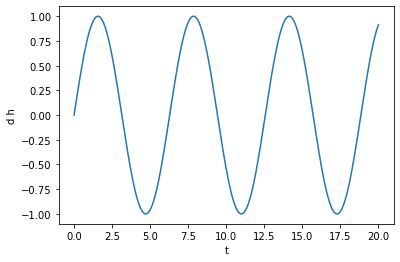

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

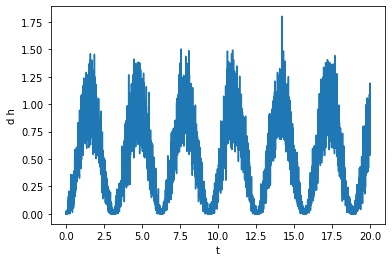

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

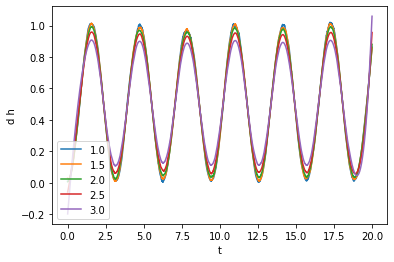

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

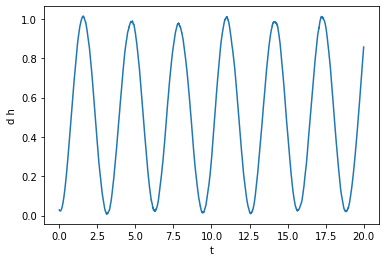

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1883


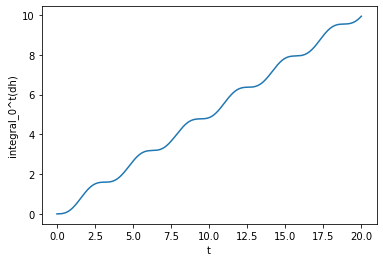

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

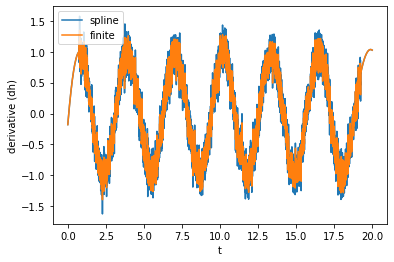

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

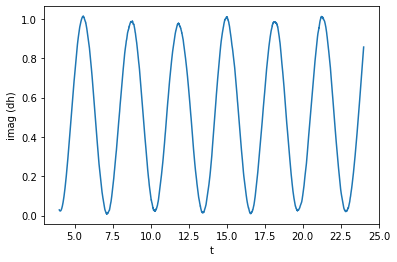

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

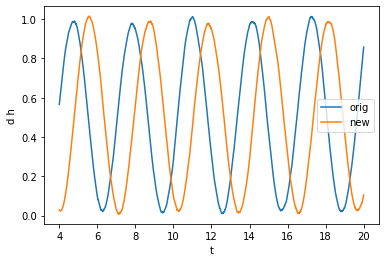

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

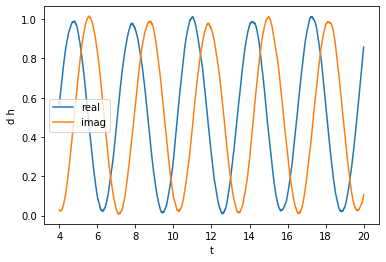

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

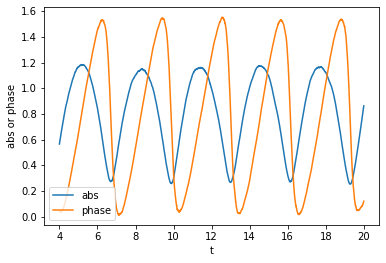

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

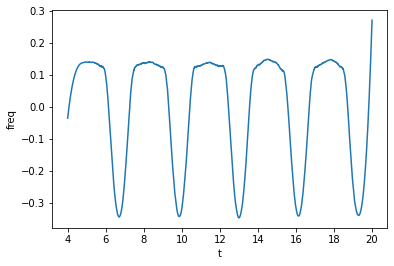

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

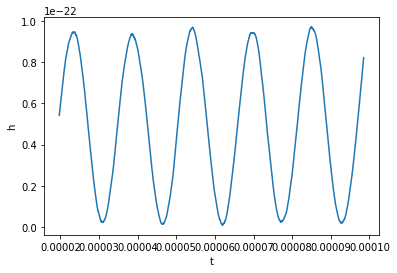

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

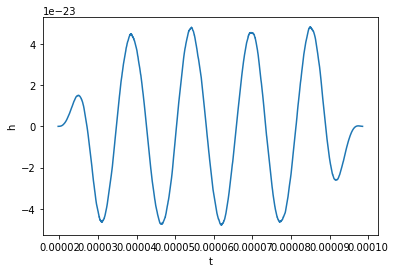

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

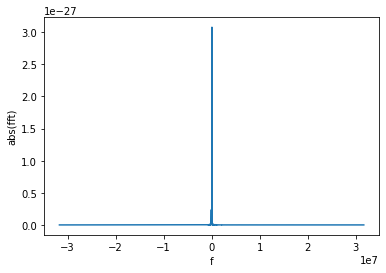

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

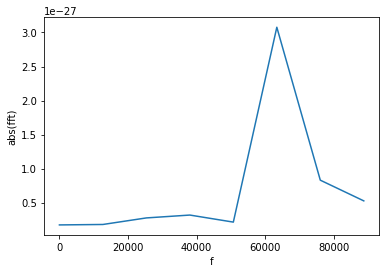

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64196.91


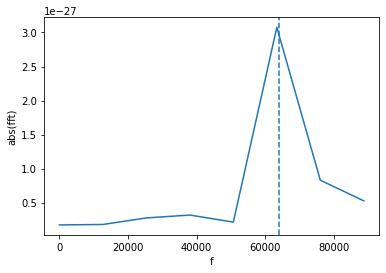

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.077e-27
Maximum with mask 8.299e-28
Length with mask 8
Length after having removed the masked points 7
